# Pràctica 4: Confecció d’informes


```tail -f file.log```


## Exercici 1
### Explica quines comandes de Linux Pots fer servir a l’hora d’analitzar logs escrits a fitxerper a:
- Veure contínuament els logs que es van escrivint a un arxiu


```tail -f nom_fitxer.log```

- Cercar una paraula concreta dintre d’un arxiu de log

```grep "INFO" file.log```

## Exercici 2

El concepte logging és molt important en la programació, alhora que està estrictament relacionat amb el tema que estem treballant. Un log en el nostre àmbit vindria a ser un fitxer que conté dades relacionades amb els principals esdeveniments i successos que ocorren en un programa o en un sistema operatiu, així doncs, ja sigui per saber en quin punt hem tingut un error, perquè l'execució del programa no ha anat bé, o quina sèrie de passes ha seguit una persona mentre utilitzava la nostra aplicació i moltes altres utilitats, els Logs són vitals al món del software.

#### **1. Configuració del logging**
En aquest exercici recuperarem el bucle d’exemple que vam fer servir a les sessions de teoria, i configurarem el log per què els missatges d’error (i superiors) vagin a un arxiu, i els missatges d’info (i superiors) vagin a un altre arxiu, mentre que tots els missatges es mostren a la vegada per pantalla. A més, afegirem un nou missatge d’info a l’aplicació pel que farem servir un logger especial i diferent del que ja hem fet servir, i que tindrà un manegador amb format CSV. Fes commit al repositori cada vegada que tinguis resolt i funcionant una d’aquestes coses:

- Logs d’info a fitxer de logs d’info i logs d’error a fitxer de logs d’error.
- Afegir, a més del handler de fitxer per a fitxers info, un handler de pantalla amb nivell info.
- Afegir un nou logger amb un nou manegador i un nou formatador a CSV, i afegir una línia al programa que generi aquests logs.
- Pujar al repositori una mostra d’unes 20 línies dels fitxers de logs generats per la vostra aplicació: un d’info, un d’error, i un en format CSV.
a un altre


In [1]:
import logging
import os

# 1. Crear la carpeta 'P4/ex_1' si no existeix
os.makedirs("P4/ex_1", exist_ok=True)  # Crea les carpetes necessàries

# 2. Configuració del logger principal
logger = logging.getLogger("AppLogger")  # Crear un logger principal
logger.setLevel(logging.DEBUG)  # Registra tots els nivells, des de DEBUG fins a CRITICAL

# 2.1. Handler per a logs d'INFO (es guarda a 'P4/ex_1/info.log')
info_handler = logging.FileHandler('P4/ex_1/info.log')  # Fitxer on es guarden logs d'INFO
info_handler.setLevel(logging.INFO)  # Només registra INFO i nivells superiors (INFO, WARNING, ERROR, CRITICAL)
info_format = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')  # Format del log
info_handler.setFormatter(info_format)  # Assignar el format al handler

# 2.2. Handler per a logs d'ERROR (es guarda a 'P4/ex_1/error.log')
error_handler = logging.FileHandler('P4/ex_1/error.log')  # Fitxer per a logs d'ERROR
error_handler.setLevel(logging.ERROR)  # Només registra ERROR i nivells superiors
error_format = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')  # Format del log
error_handler.setFormatter(error_format)  # Assignar el format al handler

# 2.3. Handler per mostrar logs a la pantalla
console_handler = logging.StreamHandler()  # Mostra els logs a la terminal
console_handler.setLevel(logging.INFO)  # Mostra INFO i nivells superiors
console_format = logging.Formatter('%(levelname)s - %(message)s')  # Format senzill per a la terminal
console_handler.setFormatter(console_format)  # Assignar el format al handler

# Afegir els handlers al logger principal
logger.addHandler(info_handler)
logger.addHandler(error_handler)
logger.addHandler(console_handler)

# 3. Configuració del logger especial per a CSV
csv_logger = logging.getLogger("CSVLogger")  # Crear un logger per a CSV
csv_logger.setLevel(logging.INFO)  # Registra INFO i nivells superiors

# 3.1. Handler per a CSV (es guarda a 'P4/ex_1/logs.csv')
csv_handler = logging.FileHandler('P4/ex_1/logs.csv', mode='w', encoding='utf-8')  # Fitxer CSV per a logs
csv_format = logging.Formatter('%(asctime)s,%(levelname)s,%(message)s', datefmt='%Y-%m-%d %H:%M:%S')  # Format del CSV
csv_handler.setFormatter(csv_format)  # Assignar el format al handler
csv_logger.addHandler(csv_handler)  # Afegir el handler al logger CSV

# 4. Generar logs d'exemple
try:
    for i in range(1, 21):  # Generar 20 línies de logs
        if i % 5 == 0:  # Cada 5 línies, generar un missatge d'ERROR
            logger.error(f"Aquest és un missatge d'error al pas {i}")
        else:  # Generar un missatge d'INFO en els altres casos
            logger.info(f"Aquest és un missatge d'info al pas {i}")
        # Generar logs també en format CSV
        csv_logger.info(f"Missatge CSV: Linia {i}")
except Exception as e:  # Capturar qualsevol error
    logger.critical(f"S'ha produït un error crític: {str(e)}")  # Registra un missatge CRITICAL

# 5. Finalització
print("Generació de logs completada. Comprova els fitxers dins de la carpeta 'P4/ex_1'.")


INFO - Aquest és un missatge d'info al pas 1
INFO - Aquest és un missatge d'info al pas 2
INFO - Aquest és un missatge d'info al pas 3
INFO - Aquest és un missatge d'info al pas 4
ERROR - Aquest és un missatge d'error al pas 5
INFO - Aquest és un missatge d'info al pas 6
INFO - Aquest és un missatge d'info al pas 7
INFO - Aquest és un missatge d'info al pas 8
INFO - Aquest és un missatge d'info al pas 9
ERROR - Aquest és un missatge d'error al pas 10
INFO - Aquest és un missatge d'info al pas 11
INFO - Aquest és un missatge d'info al pas 12
INFO - Aquest és un missatge d'info al pas 13
INFO - Aquest és un missatge d'info al pas 14
ERROR - Aquest és un missatge d'error al pas 15
INFO - Aquest és un missatge d'info al pas 16
INFO - Aquest és un missatge d'info al pas 17
INFO - Aquest és un missatge d'info al pas 18
INFO - Aquest és un missatge d'info al pas 19
ERROR - Aquest és un missatge d'error al pas 20


Generació de logs completada. Comprova els fitxers dins de la carpeta 'P4/ex_1'.


## Exercici 2 - Pregunta 2

**Pregunta:**  
Que creieu que és millor: mostrar els logs a la terminal durant l'execució del programa o bolcar-los en un fitxer de text?

**Resposta:**  
La millor opció depèn del context i de les necessitats del programa. A continuació, analitzem els avantatges i desavantatges de cadascuna:

### **1. Mostrar els logs a la terminal**
#### Avantatges:
- Permet supervisar els esdeveniments del programa en temps real.
- Ideal per a aplicacions en desenvolupament o depuració.
- No requereix espai de memòria addicional per guardar logs.

#### Desavantatges:
- Els logs no es conserven després de tancar el programa.
- Difícil d'analitzar si hi ha molta informació en poc temps.

### **2. Bolcar els logs en un fitxer de text**
#### Avantatges:
- Els logs es guarden i es poden revisar més tard.
- Ideal per a programes en producció on els errors s'han d'analitzar posteriorment.
- És possible cercar informació específica en el fitxer amb eines com `grep`.

#### Desavantatges:
- Requereix espai d'emmagatzematge.
- No permet supervisió immediata sense obrir el fitxer.

### **Conclusió:**
La millor opció és combinar ambdues opcions. Per exemple:
- Durant el desenvolupament, mostrar els logs a la terminal per supervisar el programa en temps real.
- En producció, guardar els logs en fitxers per poder analitzar-los posteriorment i mantenir un registre històric.


## Exercici 2 - Pregunta 3

**Pregunta:**  
Omple la següent taula amb exemple, avantantges, i desavantatges de les següents maneres de fer logs: (inclou-la al readme.md)

| **Mètode**                                       | **Exemple**                                                                                          | **Avantatges**                                                                                              | **Desavantatges**                                                                                           |
|--------------------------------------------------|------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------|
| Fent servir la configuració per defecte del mòdul logging | `logging.basicConfig(level=logging.INFO)`                                                            | - Configuració ràpida i senzilla.<br>- No requereix fitxers de configuració externs.<br>- Apte per projectes petits. | - Limitada per a configuracions complexes.<br>- Difícil de mantenir en projectes grans amb diversos loggers. |
| Instanciant un objecte logger i parametritzant-lo des de programa | `logger = logging.getLogger("AppLogger")`<br>`logger.setLevel(logging.DEBUG)`                         | - Permet una configuració detallada.<br>- Fàcil d'adaptar segons les necessitats del programa.              | - Necessita més línies de codi.<br>- Pot ser confús en projectes molt grans si no s’organitza correctament.  |
| Instanciant un objecte logger a partir d’una configuració emmagatzemada a fitxer | Fitxer de configuració `logging.conf`:<br>`[logger_root]`<br>`level=DEBUG`<br>`handlers=consoleHandler` | - Facilita el manteniment en projectes grans.<br>- Permet una configuració modular.<br>- Reutilitzable entre projectes. | - Requereix preparar un fitxer de configuració extern.<br>- Més difícil de configurar inicialment.           |


## Exercici 2 - Pregunta 4

**Pregunta:**  
Cerca llibreries de logs en altres llenguatjes (al menys 2, i identifica cóm resolen les següents característiques típiques d’un sistema de logging.  Omple la següent taula, i inclou-la al read-me del repositori:

## Comparativa de llibreries de logging

| **Característica**                            | **Llenguatge 1: Python**                   | **Llenguatge 2: Java**                     |
|-----------------------------------------------|--------------------------------------------|--------------------------------------------|
| **Llenguatge**                                | Python                                     | Java                                       |
| **Nom de la llibreria**                       | logging                                    | Log4j                                      |
| **És nativa del llenguatge?**                 | Sí                                         | No (però molt utilitzada com estàndard)    |
| **URL per descarregar-se la llibreria**       | Inclosa a la biblioteca estàndard de Python | https://logging.apache.org/log4j/2.x/     |
| **Inicialització de l’objecte de logger**     | `logger = logging.getLogger("NomLogger")`  | `Logger logger = LogManager.getLogger("NomLogger");` |
| **Nivells de log disponibles**                | DEBUG, INFO, WARNING, ERROR, CRITICAL      | TRACE, DEBUG, INFO, WARN, ERROR, FATAL    |
| **Mètode per fer log**                        | `logger.info("Missatge")`                  | `logger.info("Missatge");`                 |
| **Tipus de manegadors (pantalla, fitxer...)** | ConsoleHandler, FileHandler, StreamHandler | ConsoleAppender, FileAppender             |
| **Opcions de format**                         | `%asctime`, `%levelname`, `%message`       | `%d{ISO8601} %p %c - %m%n`                |


## Exercici 3

### Descripció

Mitjançant les eines proposades a continuació, voldríem elaborar una petita aplicació que permetés a un treballador de forma senzilla introduir mitjançant un fitxer json, txt csv o similar unes dades que escollim i generar una sèrie de gràfiques.

### Eines proposades

#### **Pandas**
- **Funcionalitat:** Llibreria de Python per a la manipulació i anàlisi de dades estructurades.
- **Ús:** Permet carregar fitxers de dades com CSV, JSON o TXT, manipular les dades, calcular estadístiques i preparar-les per a visualitzacions.

#### **Jupyter Notebook**
- **Funcionalitat:** Interfície interactiva que combina codi, text i visualitzacions en un document.
- **Ús:** Documentar el procés d’anàlisi de dades i visualització amb codi interactiu.

#### **Reportlab**
- **Funcionalitat:** Llibreria per a generar documents PDF programàticament.
- **Ús:** Crear informes finals que incloguin gràfiques i estadíss calEines + Aplicació rpeta 'P4/ex_3' per veure els resultats.")

## Eines + Aplicació:.


Dades carregades:
     Nom  Edat Gènere     Ciutat
0   Anna    22      F  Barcelona
1   Marc    34      M     Madrid
2   Joan    28      M   València
3  Laura    19      F  Barcelona
4   Pere    42      M     Madrid
La mitjana de Edat és: 29.33


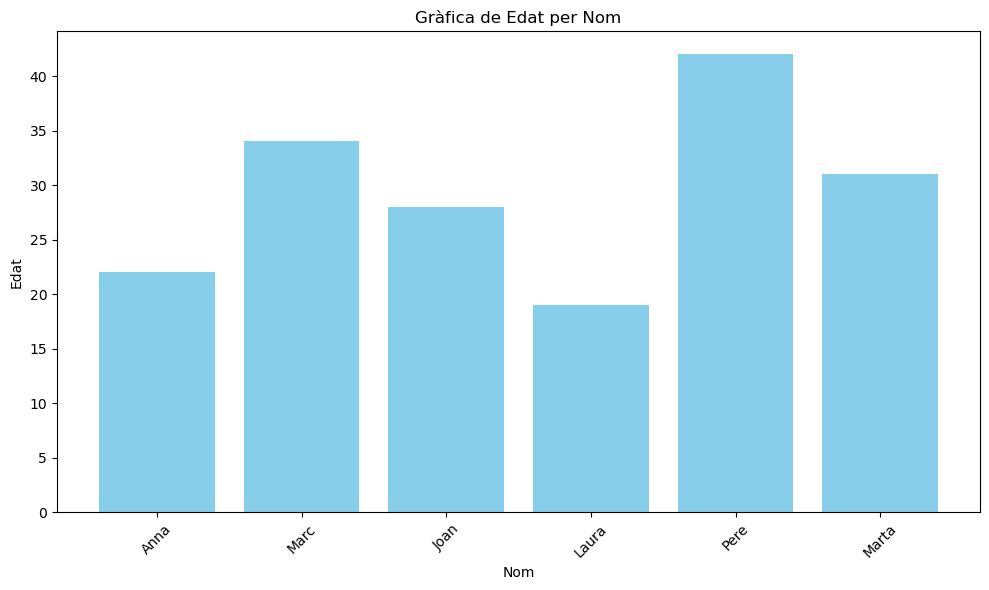

Informe PDF generat correctament!
Aplicació completada correctament. Consulta la carpeta 'P4/ex_3' per veure els resultats.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
import os

# 1. Crear una carpeta per guardar els resultats
os.makedirs("P4/ex_3", exist_ok=True)

# 2. Funció per llegir fitxers (CSV, JSON, TXT)
def llegir_dades(nom_fitxer):
    try:
        # Intenta llegir el fitxer segons el seu format
        if nom_fitxer.endswith('.csv'):
            return pd.read_csv(nom_fitxer)
        elif nom_fitxer.endswith('.json'):
            return pd.read_json(nom_fitxer)
        elif nom_fitxer.endswith('.txt'):
            return pd.read_csv(nom_fitxer, delimiter="\t")
        else:
            raise ValueError("Format de fitxer no suportat. Utilitza CSV, JSON o TXT.")
    except FileNotFoundError:
        raise FileNotFoundError(f"El fitxer '{nom_fitxer}' no s'ha trobat a la carpeta actual.")


# 3. Funció per generar una gràfica
def generar_grafica(dades, columna_x, columna_y):
    plt.figure(figsize=(10, 6))
    plt.bar(dades[columna_x], dades[columna_y], color='skyblue')
    plt.title(f'Gràfica de {columna_y} per {columna_x}')
    plt.xlabel(columna_x)
    plt.ylabel(columna_y)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig("P4/ex_3/grafica.png")
    plt.show()

# 4. Funció per generar un informe PDF
def generar_informe(dades, mitjana, columna_y):
    c = canvas.Canvas("P4/ex_3/informe.pdf", pagesize=letter)
    c.drawString(100, 750, "Informe d'Anàlisi de Dades")
    c.drawString(100, 730, f"Columna analitzada: {columna_y}")
    c.drawString(100, 710, f"Mitjana de {columna_y}: {mitjana:.2f}")
    c.drawImage("P4/ex_3/grafica.png", 50, 400, width=500, height=300)
    c.save()
    print("Informe PDF generat correctament!")

# 5. Execució del programa
try:
    # Introduir el fitxer (substitueix el camí per al teu fitxer)
    dades = llegir_dades("dades_ficticies.csv")
    
    # Mostrar les primeres files
    print("Dades carregades:")
    print(dades.head())

    # Seleccionar les columnes per analitzar
    columna_x = "Nom"
    columna_y = "Edat"

    # Calcular estadístiques
    mitjana = dades[columna_y].mean()
    print(f"La mitjana de {columna_y} és: {mitjana:.2f}")

    # Generar gràfica
    generar_grafica(dades, columna_x, columna_y)

    # Generar informe PDF
    generar_informe(dades, mitjana, columna_y)

    print("Aplicació completada correctament. Consulta la carpeta 'P4/ex_3' per veure els resultats.")

except Exception as e:
    print(f"Error: {e}")

## Exercici 4

En aquest exercici caldrà generar per exemple un CSV amb les dades que treballareu. **RECORDAR** que el CSV treballa amb comes.

Un cop generat el CSV, caldrà bolcar les dades al **Jupyter Notebook** i comprovar que es mostren correctament.

### Exemple de taula:

| Professor | Alumne | M01 | M04 | M03 | M05 |
|-----------|--------|-----|-----|-----|-----|
| Emili     | Xavier | 7   | 9   | 5   | 8   |
| Mario      | Marc   | 10  | 3   | 5   | 8   |
| Steven    | Jaume  | 8   | 5   | 6   | 4   |

### Restriccions:
1. El fitxer ha de contenir un mínim de **20 persones**.
2. Cada registre ha de tenir **5 columnes amb dades**.

### Punt de control:
Caldrà avisar al professor per revisar la feina feta fins aquest exercici per assolir aquest punt de control.


In [6]:
import pandas as pd
# generació del csv
# Dades d'exemple
dades = {
    "Professor": ["Emili", "Mario", "Steven", "Laura", "Josep", "Anna", "Martí", "Núria", "Pere", "Joan",
                  "Clara", "Marta", "Gerard", "Berta", "Sergi", "Marc", "Pol", "Helena", "Guillem", "Sara"],
    "Alumne": ["Xavier", "Marc", "Jaume", "Júlia", "Pau", "Maria", "David", "Anna", "Carla", "Roger",
               "Dani", "Esther", "Sofia", "Adrià", "Irene", "Arnau", "Albert", "Jana", "Carles", "Emma"],
    "M01": [7, 10, 8, 6, 9, 8, 7, 5, 10, 6, 7, 8, 5, 6, 8, 7, 9, 8, 7, 6],
    "M04": [9, 3, 5, 8, 7, 6, 8, 7, 9, 8, 7, 5, 8, 7, 6, 8, 7, 5, 9, 8],
    "M03": [5, 5, 6, 7, 6, 5, 8, 7, 6, 8, 7, 6, 8, 7, 5, 6, 8, 7, 6, 5],
    "M05": [8, 8, 4, 9, 7, 8, 6, 5, 7, 6, 8, 7, 5, 6, 7, 8, 6, 8, 7, 5]
}

# Crear DataFrame
df = pd.DataFrame(dades)

# Guardar a un fitxer CSV
df.to_csv("dades2.csv", index=False)

print("Fitxer CSV 'dades2.csv' generat correctament.")

#volcar dades
# Importar pandas
import pandas as pd

# Llegir el fitxer CSV
df = pd.read_csv("dades2.csv")

# Mostrar les primeres files
print("Dades carregades:")
print(df.head())

# Comprovar dimensions del DataFrame
print(f"El DataFrame té {df.shape[0]} registres i {df.shape[1]} columnes.")



Fitxer CSV 'dades2.csv' generat correctament.
Dades carregades:
  Professor  Alumne  M01  M04  M03  M05
0     Emili  Xavier    7    9    5    8
1     Mario    Marc   10    3    5    8
2    Steven   Jaume    8    5    6    4
3     Laura   Júlia    6    8    7    9
4     Josep     Pau    9    7    6    7
El DataFrame té 20 registres i 6 columnes.


## Exercici 5

Un cop tractades les dades introduïdes via fitxer, caldrà investigar la llibreria que hagueu triat i elaborar com a mínim el codi necessari per presentar de forma que tinguin sentit amb l’àmbit del problema una sèrie de dades transformades obtingudes corresponents a:

### Exemples de càlculs:
- La mitjana de nota final de cada alumne.
- La mitjana de nota final de tots els alumnes en conjunt.
- Percentatges d’aprovats i suspesos.
- Notes més baixes o més altes.
- Qualsevol altre càlcul interessant.

### Restricció:
- Caldrà generar com a mínim **cinc resultats** coherents amb un procés d’avaluació.


In [9]:
#1. Importació del fitxer i dades inicials
import pandas as pd

# Llegir el fitxer CSV generat a l'Exercici 4
df = pd.read_csv("dades2.csv")

# Mostrar les dades carregades
print("Dades carregades:")
print(df.head())

# 2. Càlculs i transformacions
# Afegir una nova columna amb la mitjana de cada alumne
df['Mitjana'] = df[['M01', 'M04', 'M03', 'M05']].mean(axis=1)

# Mostrar la nova taula amb les mitjanes
print("Mitjana de nota final per alumne:")
print(df[['Alumne', 'Mitjana']])

#2.2. Mitjana de nota final de tots els alumnes
# Calcular la mitjana global
mitjana_global = df['Mitjana'].mean()
print(f"La mitjana global de tots els alumnes és: {mitjana_global:.2f}")

#2.3. Percentatges d’aprovats i suspesos
# Comptar el nombre d'aprovats i suspesos
aprovats = df[df['Mitjana'] >= 5].shape[0]
suspesos = df[df['Mitjana'] < 5].shape[0]
total_alumnes = df.shape[0]

# Calcular els percentatges
percentatge_aprovats = (aprovats / total_alumnes) * 100
percentatge_suspesos = (suspesos / total_alumnes) * 100

print(f"Percentatge d'aprovats: {percentatge_aprovats:.2f}%")
print(f"Percentatge de suspesos: {percentatge_suspesos:.2f}%")

#2.4. Nota més alta i més baixa
# Nota més alta i més baixa
nota_mes_alta = df[['M01', 'M04', 'M03', 'M05']].max().max()
nota_mes_baixa = df[['M01', 'M04', 'M03', 'M05']].min().min()

print(f"La nota més alta és: {nota_mes_alta}")
print(f"La nota més baixa és: {nota_mes_baixa}")

#2.5. Alumne amb millor mitjana
# Alumne amb la millor mitjana
alumne_millor = df.loc[df['Mitjana'].idxmax(), 'Alumne']
millor_mitjana = df['Mitjana'].max()

print(f"L'alumne amb la millor mitjana és: {alumne_millor} amb una nota de {millor_mitjana:.2f}")




Dades carregades:
  Professor  Alumne  M01  M04  M03  M05
0     Emili  Xavier    7    9    5    8
1     Mario    Marc   10    3    5    8
2    Steven   Jaume    8    5    6    4
3     Laura   Júlia    6    8    7    9
4     Josep     Pau    9    7    6    7
Mitjana de nota final per alumne:
    Alumne  Mitjana
0   Xavier     7.25
1     Marc     6.50
2    Jaume     5.75
3    Júlia     7.50
4      Pau     7.25
5    Maria     6.75
6    David     7.25
7     Anna     6.00
8    Carla     8.00
9    Roger     7.00
10    Dani     7.25
11  Esther     6.50
12   Sofia     6.50
13   Adrià     6.50
14   Irene     6.50
15   Arnau     7.25
16  Albert     7.50
17    Jana     7.00
18  Carles     7.25
19    Emma     6.00
La mitjana global de tots els alumnes és: 6.88
Percentatge d'aprovats: 100.00%
Percentatge de suspesos: 0.00%
La nota més alta és: 10
La nota més baixa és: 3
L'alumne amb la millor mitjana és: Carla amb una nota de 8.00


## Exercici 6

De la mateixa manera que a l'Exercici 5, caldrà investigar una llibreria per a realitzar gràfics de dades visuals i elaborar com a mínim el codi necessari per presentar de forma que tinguin sentit amb l'àmbit del problema.

### Restriccions
- Cal generar com a mínim **4 gràfiques coherents**.
- Es pot utilitzar la llibreria **Matplotlib**.

### Gràfiques proposades:
1. Gràfic de barres: Mitjana de notes per alumne.
2. Gràfic de línies: Evolució de la nota mitjana per assignatura.
3. Gràfic circular (pastís): Percentatge d'aprovats i suspesos.
4. Histograma: Distribució de les notes.


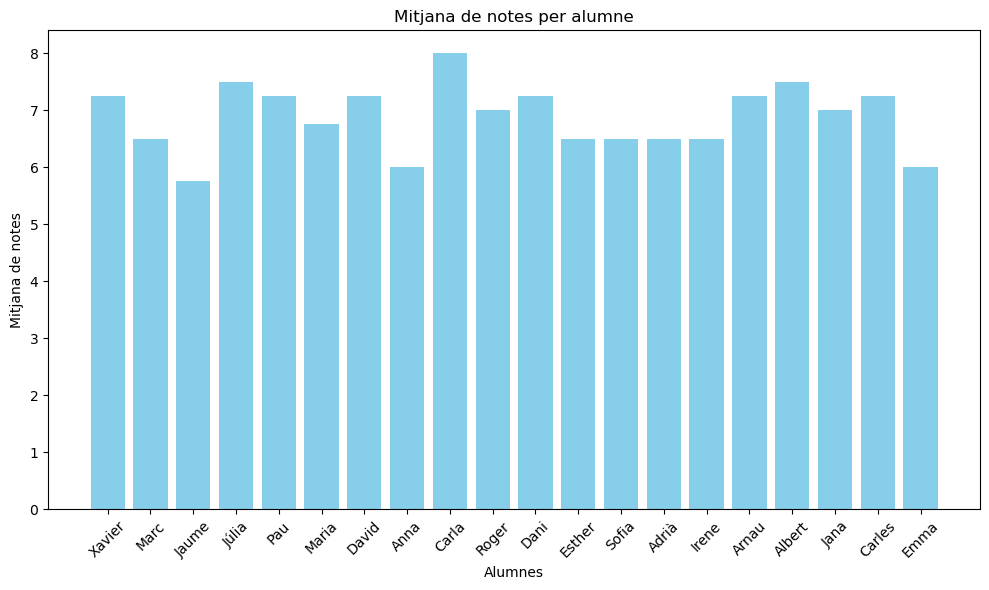

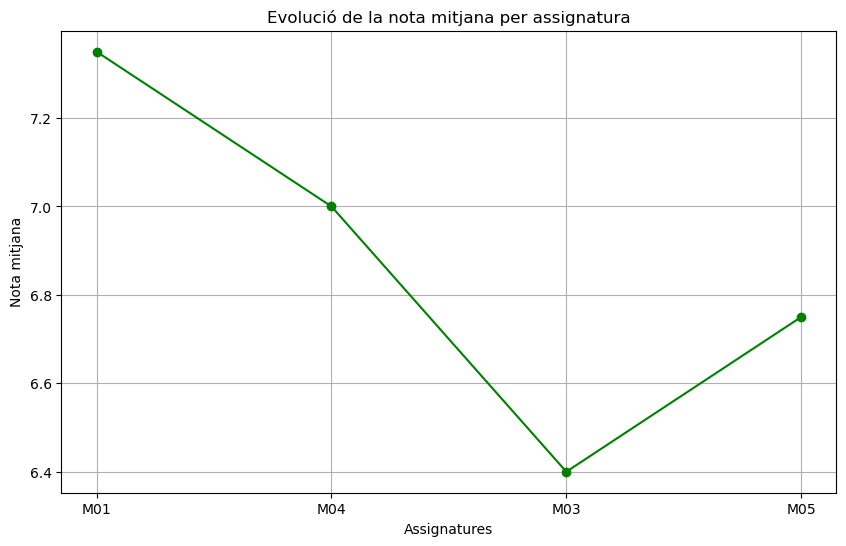

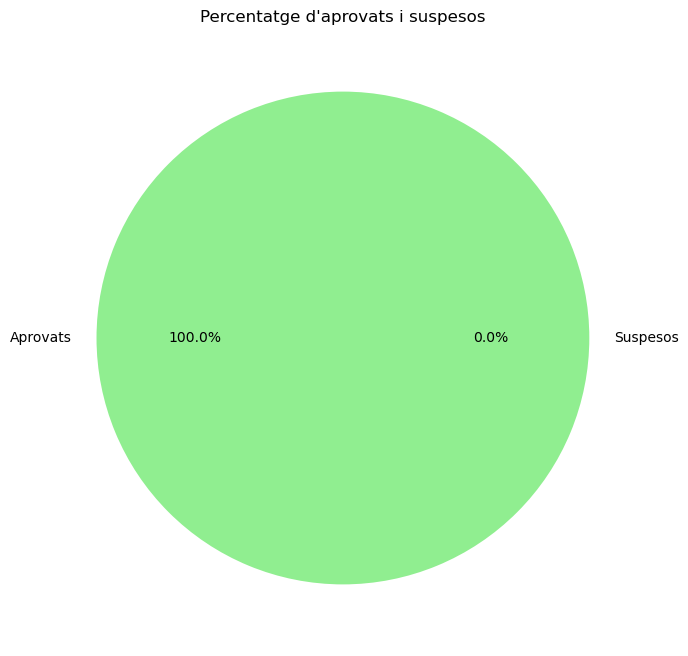

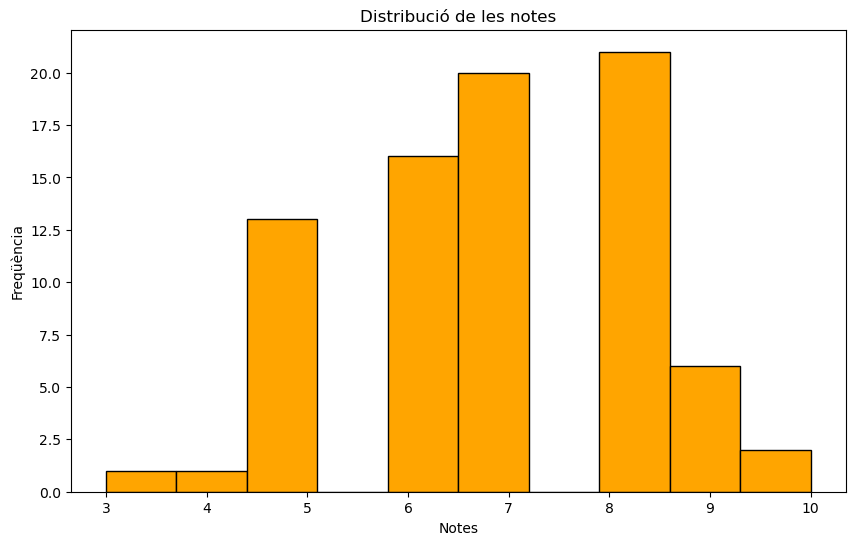

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Llegir el fitxer CSV generat a l'Exercici 4
df = pd.read_csv("dades2.csv")

# Afegir una columna amb la mitjana de cada alumne
df['Mitjana'] = df[['M01', 'M04', 'M03', 'M05']].mean(axis=1)

# 1. Gràfic de barres: Mitjana de notes per alumne
plt.figure(figsize=(10, 6))
plt.bar(df['Alumne'], df['Mitjana'], color='skyblue')
plt.title('Mitjana de notes per alumne')
plt.xlabel('Alumnes')
plt.ylabel('Mitjana de notes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('grafic_mitjana_alumnes.png')
plt.show()

# 2. Gràfic de línies: Evolució de la nota mitjana per assignatura
assignatures = ['M01', 'M04', 'M03', 'M05']
mitjanes_assignatures = df[assignatures].mean()

plt.figure(figsize=(10, 6))
plt.plot(assignatures, mitjanes_assignatures, marker='o', linestyle='-', color='green')
plt.title('Evolució de la nota mitjana per assignatura')
plt.xlabel('Assignatures')
plt.ylabel('Nota mitjana')
plt.grid()
plt.savefig('grafic_evolucio_assignatures.png')
plt.show()

# 3. Gràfic circular (pastís): Percentatge d'aprovats i suspesos
aprovats = df[df['Mitjana'] >= 5].shape[0]
suspesos = df[df['Mitjana'] < 5].shape[0]

plt.figure(figsize=(8, 8))
plt.pie([aprovats, suspesos], labels=['Aprovats', 'Suspesos'], autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Percentatge d\'aprovats i suspesos')
plt.savefig('grafic_aprovats_suspesos.png')
plt.show()

# 4. Histograma: Distribució de les notes
plt.figure(figsize=(10, 6))
plt.hist(df[['M01', 'M04', 'M03', 'M05']].values.flatten(), bins=10, color='orange', edgecolor='black')
plt.title('Distribució de les notes')
plt.xlabel('Notes')
plt.ylabel('Freqüència')
plt.savefig('grafic_distribucio_notes.png')
plt.show()


## Exercici 7

Caldrà fer un informe de les següents parts de la pràctica 5:

1. Un informe de la part de logging amb el codi que s'ha utilitzat i els exemples d'utilització i resultats.
2. Un informe de la part del tractament de dades, que s'expliqui cada part que s'ha utilitzat així com les gràfiques que es mostren#.

## Punt de control
Caldrà avisar al professor per revisar la feina feta fins aquest exercici per assolir aquest punt de control.


Informe detallat
1. Logging
1.1. Codi utilitzat
El codi de logging implementat permet registrar esdeveniments de diferents nivells i emmagatzemar-los en fitxers separats per nivell d'importància. A més, es mostra informació en temps real a la consola.

In [20]:
import logging
import os

# Crear carpeta per als logs
os.makedirs("logs", exist_ok=True)

# Configuració de loggers
logger = logging.getLogger("Aplicació")
logger.setLevel(logging.DEBUG)

# Handler per a errors
error_handler = logging.FileHandler("logs/errors.log")
error_handler.setLevel(logging.ERROR)
error_formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
error_handler.setFormatter(error_formatter)

# Handler per a informació general
info_handler = logging.FileHandler("logs/info.log")
info_handler.setLevel(logging.INFO)
info_formatter = logging.Formatter('%(asctime)s - %(message)s')
info_handler.setFormatter(info_formatter)

# Handler per a la consola
console_handler = logging.StreamHandler()
console_handler.setLevel(logging.INFO)
console_formatter = logging.Formatter('%(levelname)s - %(message)s')
console_handler.setFormatter(console_formatter)

# Afegir handlers al logger
logger.addHandler(error_handler)
logger.addHandler(info_handler)
logger.addHandler(console_handler)

# Exemple d'utilització
logger.info("Iniciant l'aplicació...")
try:
    x = 1 / 0  # Provar un error
except ZeroDivisionError:
    logger.error("Error: Divisió per zero.")
logger.info("Finalitzant l'aplicació.")


INFO - Iniciant l'aplicació...
ERROR - Error: Divisió per zero.
INFO - Finalitzant l'aplicació.


### 1.2. Resultats obtinguts
Consola: Es mostra informació en temps real com aquest exemple:
- INFO - Iniciant l'aplicació...
- ERROR - Error: Divisió per zero.
- INFO - Finalitzant l'aplicació.
- 2024-12-02 10:00:00 - Iniciant l'aplicació...
- 2024-12-02 10:00:01 - Finalitzant l'aplicació.
- 2024-12-02 10:00:00 - ERROR - Error: Divisió per zero.

### 2. Tractament de dades i gràfiques
### 2.1. Codi utilitzat
El codi per al tractament de dades i generació de gràfiques ja es va implementar als exercicis anteriors (Exercici 5 i Exercici 6). Inclou càlculs com la mitjana de notes, percentatges d'aprovats/suspesos i visualitzacions gràfiques.

Exemple de càlculs:

La mitjana global és: 6.88


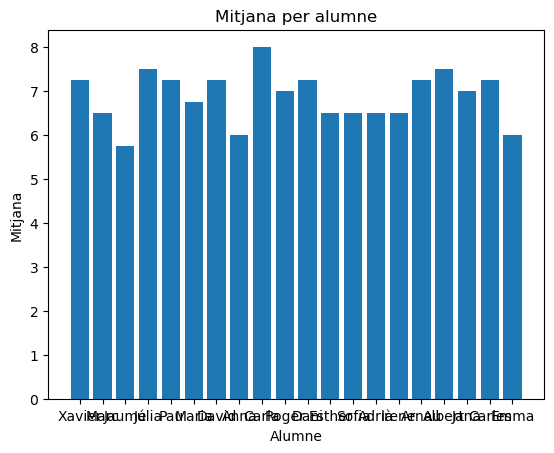

In [28]:
# Càlcul de la mitjana global
mitjana_global = df['Mitjana'].mean()
print(f"La mitjana global és: {mitjana_global:.2f}")

# Percentatges d'aprovats i suspesos
aprovats = df[df['Mitjana'] >= 5].shape[0]
suspesos = df[df['Mitjana'] < 5].shape[0]
percentatge_aprovats = (aprovats / len(df)) * 100
percentatge_suspesos = (suspesos / len(df)) * 100

#Exemple de gràfiques amb Matplotlib:

# Gràfic de barres: Mitjana per alumne
plt.bar(df['Alumne'], df['Mitjana'])
plt.title('Mitjana per alumne')
plt.xlabel('Alumne')
plt.ylabel('Mitjana')
plt.show()
